# Pegar os indicadores do BC

<p><b>Sistema Gerenciador de Séries Temporais do BC</b></p>
https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

<p><b>Módulo para obter os dados em Python</b></p>
https://wilsonfreitas.github.io/python-bcb/sgs.html

## 1.0 Bibliotecas

In [5]:
import mplcyberpunk

from bcb                   import currency
from bcb                   import sgs

import matplotlib.pyplot   as plt
import matplotlib.ticker   as mtick
import matplotlib.dates    as mdates
from matplotlib.dates      import date2num

from datetime              import datetime
from datetime              import timedelta

plt.style.use("cyberpunk")

## 2.0 Dados de Taxa de Juros

In [9]:
# Série SELIC

dt_inicio = '2010-01-01' #data inicial da série temporal

selic = sgs.get({'selic': 432}, start = dt_inicio) # selecionando a selic 432 conforme a tabela do BC

selic # mostrando os dados

,selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2023-05-27,13.75
2023-05-28,13.75
2023-05-29,13.75


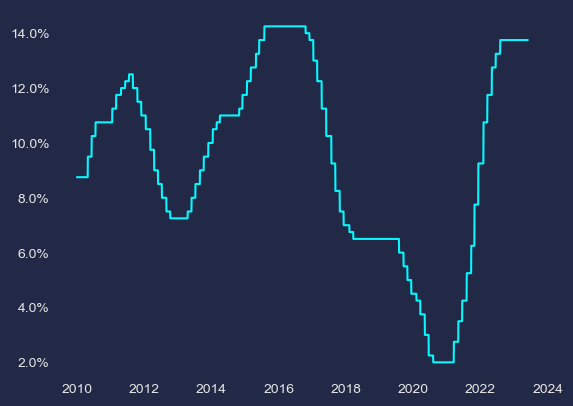

In [10]:
fig, ax = plt.subplots()

plt.style.use('cyberpunk') # ativando o estilo de visualização do gráfico

ax.plot(selic.index, selic['selic']) # plotando no eixo 'x' as datas que estão no index dos dados ('selic.index') e informado os dados na coluna 'selic'
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) # transformando o eixo 'y' em porcentagem
ax.grid(False) # removendo as linhas do grid para deixar a exibição mais limpa
plt.savefig('selic.png', dpi = 300) # salvando a imagem 

plt.show() # exibindo o gráfico

## 3.0 Dados de Inflação

In [12]:
# Período de análise

hoje = datetime.now() # data atual
um_ano_atras = hoje - timedelta(days = 366) # determinando 1 ano antes

# Selecionando e buscando os dados
inflacao = sgs.get({'ipca':  433,
                    'igp-m': 189}, start = um_ano_atras + timedelta(180))

inflacao

,ipca,igp-m
Date,,
2022-11-01,0.41,-0.56
2022-12-01,0.62,0.45
2023-01-01,0.53,0.21
2023-02-01,0.84,-0.06
2023-03-01,0.71,0.05
2023-04-01,0.61,-0.95
2023-05-01,NaN,-1.84


TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

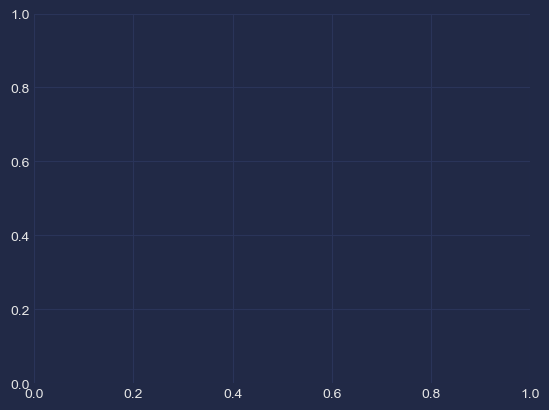

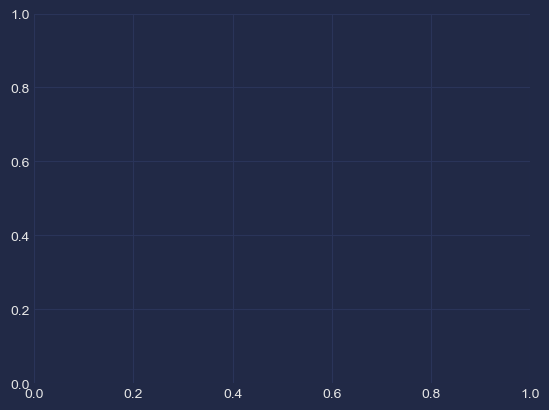

In [37]:
# Gráfico

datas_numericas = date2num(inflacao.index)

datas_numericas = plt.subplots()

fig, ax = plt.subplots()

ax.bar(datas_numericas-7, inflacao['ipca'], label = 'IPCA', width = 7)
ax.bar(datas_numericas, inflacao['igp-m'], label = 'IGP-M', width = 7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(False)
plt.axhline(y=0, color='w')
plt.legend()
plt.savefig('inflacao.png', dpi = 300)

plt.show()